# Redes Neurais Artificiais
## Perceptron

O <i>Perceptron</i>, idealizado por Rosennblatt (1958), é a forma mais simples de configuração de uma rede neural artificial, cujo o propósito focava em implementar um modelo computacional inspirado na retina, objetivando-se então um elemento de percepção eletrônica de sinais. Uma de suas aplicações consistia de indentificar padrões geométricos.

A simplicidade da rede <i>Perceptron</i> está associada à sua condição de ser constituída de apenas uma camada neural, tendose também somente um neurônio artificial neta camada única.

Embora seja uma rede simples, o <i>Perceptron</i> teve o potencial de atrair, quando de sua proposição, diversos pesquisadores que aspiravam inverstigar essa promissora área de pesquisa para a época, recebendo-se ainda especial atenção da comunidade cientifíca que também trabalhava com inteligência artificial.

Neurônio Artificial
![](../images/perceptron.png)


Neurônio Artificial vs  Neurônio Biológico
![](../images/neuronio_matematico_e_biologico.png)

Alguns dados interessantes: 

- Cérebro humano possui 85 bilhões de neurônios
- Cérebro de um gato possui 1 bilhão de neurônios
- Cérebro de um rato possui 75 milhões de neurônios
- Cérebro de uma barata possui 1 millhão de neurônios

O <i>Perceptron</i> pertence à arquitetura <b><i>feedforward</i></b> de camada única, pois o fluxo de informação em sua estrutura reside sempre no sentido da camada de entrada em direção à camada neural de saída, inexistindo-se qualquer tipo de realimentação de valores produzidos pelo seu único neurônio. 
![](../images/feedforward_camada_unica.png)

Em termos matemáticos, o processamento interno realizado pelo <i>Perceptron</i> pode ser descrito pelas seguintes expressões:

![](../images/equacao_matematica_perceptron.jpg)

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

![](../images/perceptron_rule.png)

In [242]:
class Perceptron(object):
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def train(self, X, y):
        # o valor 1 somado com o shape é o bias adicionado no vetor de pesos
        self._weights = np.zeros(1 + X.shape[1])
        self._errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                # verificando a diferença entre o valor esperado do previsto
                error = (target - self.predict(xi))
                # contabilizando os erros
                errors += int(error != 0.0) 
                
                # valor de atualização dos pesos
                update = self.learning_rate * error
                self._weights[1:] += update * xi
                self._weights[0] += update
                
            self._errors.append(errors)
        return self
                
    def net_input(self, X):
        w_bias = self._weights[0]
        return np.dot(X, self._weights[1:]) + w_bias
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        # função de ativação degrau bipolar
        return np.where(self.activation(X) >= 0.0, 1, -1)
        

In [234]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [235]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

In [243]:
clf = Perceptron(epochs=10)
clf.train(X, y)

In [237]:
clf._weights

array([-0.04 , -0.068,  0.182])

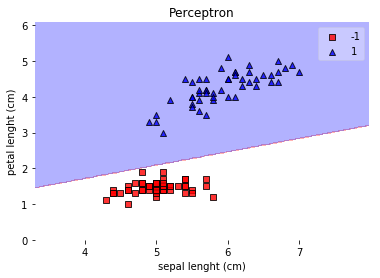

In [238]:
plot_decision_regions(X, y, clf=clf)
plt.title('Perceptron')
plt.xlabel('sepal lenght (cm)')
plt.ylabel('petal lenght (cm)')
plt.show()

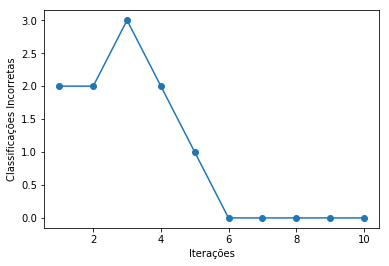

In [239]:
plt.plot(range(1, len(clf._errors)+1), clf._errors, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

### Problema do XOR com o Perceptron

In [171]:
dataset = pd.DataFrame([[1,1,0], [1,0,1], [0,1,1], [0,0,0]], columns=['feature1', 'feature1', 'target'])
dataset

,feature1,feature1,target
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


In [172]:
X = dataset.values[:,:2]
y = dataset['target'].values

In [173]:
clf = Perceptron(epochs=10)
clf.train(X, y)

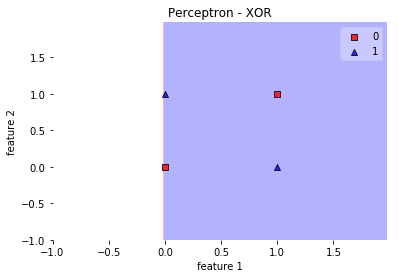

In [174]:
plot_decision_regions(X, y, clf=clf)
plt.title('Perceptron - XOR')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

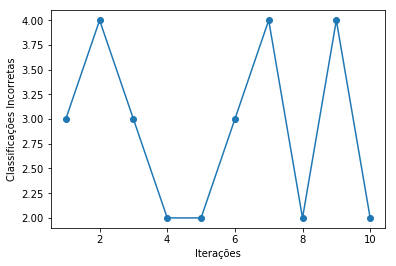

In [175]:
plt.plot(range(1, len(clf._errors)+1), clf._errors, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

##### Deep Learning, o Estado da Arte!
![](../images/deep_learning_1.png)

Vídeo bem interressante explicando o funcionamento do Perceptron:
 - [Aprendizagem de Máquina com Perceptron](https://www.youtube.com/watch?v=-C07ansuc-8)